In [1]:
import duckdb as db

In [2]:
import pandas as pd

In [4]:
penguins = pd.read_csv('penguins.csv')

In [5]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [11]:
db.query("SELECT * FROM penguins")

┌─────────┬───────────┬────────────────┬───────────────┬───────────────────┬─────────────┬─────────┐
│ species │  island   │ bill_length_mm │ bill_depth_mm │ flipper_length_mm │ body_mass_g │   sex   │
│ varchar │  varchar  │     double     │    double     │      double       │   double    │ varchar │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼─────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ MALE    │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ FEMALE  │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ FEMALE  │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL    │
│ Adelie  │ Torgersen │           36.7 │          19.3 │             193.0 │      3450.0 │ FEMALE  │
│ Adelie  │ Torgersen │           39.3 │          20.6 │             190.0 │      3650.0 │ 

In [13]:
db.query("SELECT species, island, AVG(body_mass_g) FROM penguins GROUP BY species, island ORDER BY AVG(body_mass_g) DESC")

┌───────────┬───────────┬────────────────────┐
│  species  │  island   │  avg(body_mass_g)  │
│  varchar  │  varchar  │       double       │
├───────────┼───────────┼────────────────────┤
│ Gentoo    │ Biscoe    │  5076.016260162602 │
│ Chinstrap │ Dream     │ 3733.0882352941176 │
│ Adelie    │ Biscoe    │  3709.659090909091 │
│ Adelie    │ Torgersen │  3706.372549019608 │
│ Adelie    │ Dream     │ 3688.3928571428573 │
└───────────┴───────────┴────────────────────┘

In [32]:
penguins_notnull = db.query("""SELECT species, island, body_mass_g, bill_length_mm FROM penguins
                               WHERE body_mass_g > 0.0 OR bill_length_mm > 0.0""").to_df()

In [33]:
penguins_notnull

,species,island,body_mass_g,bill_length_mm
0,Adelie,Torgersen,3750.0,39.1
1,Adelie,Torgersen,3800.0,39.5
2,Adelie,Torgersen,3250.0,40.3
3,Adelie,Torgersen,3450.0,36.7
4,Adelie,Torgersen,3650.0,39.3
...,...,...,...,...
337,Gentoo,Biscoe,4925.0,47.2
338,Gentoo,Biscoe,4850.0,46.8
339,Gentoo,Biscoe,5750.0,50.4
340,Gentoo,Biscoe,5200.0,45.2


In [35]:
import seaborn as sns

<Axes: xlabel='island', ylabel='bill_length_mm'>

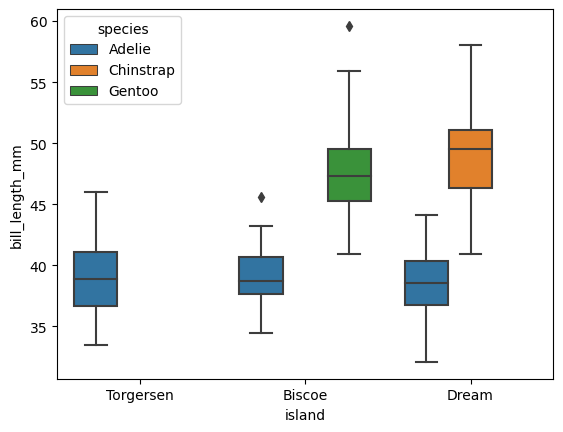

In [42]:
sns.boxplot(data=penguins_notnull, x='island', y='bill_length_mm', hue='species')

E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


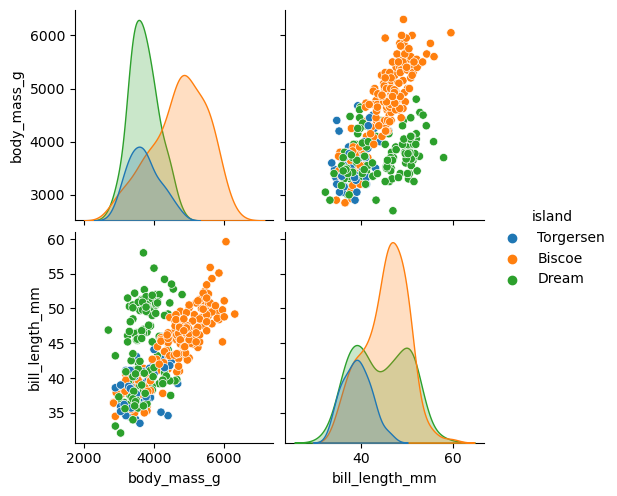

In [44]:
sns.pairplot(penguins_notnull, hue='island')

E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


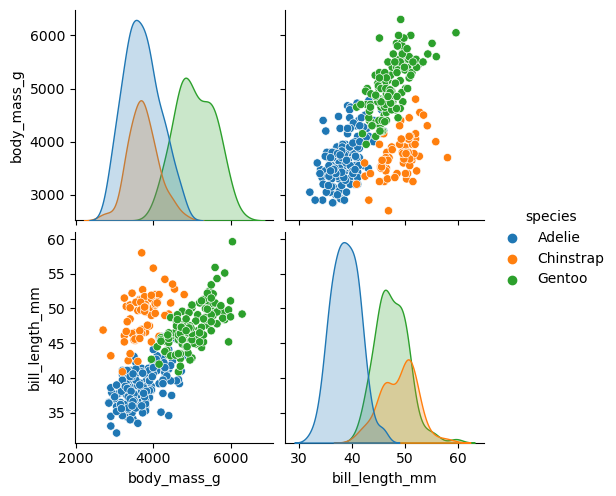

In [45]:
sns.pairplot(penguins_notnull, hue='species')